### Linear Regression Single Variable

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [4]:
df = pd.read_csv('LR1.csv')
df

,Area,Price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


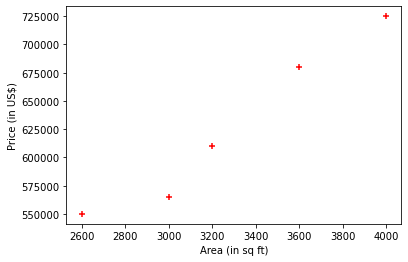

In [28]:
# %matplotlib inline
plt.xlabel('Area (in sq ft)')
plt.ylabel('Price (in US$)')
plt.scatter(df.Area,df.Price,color = 'red',marker = '+')

In [33]:
reg = linear_model.LinearRegression()
reg.fit(df[['Area']],df.Price)


LinearRegression()

In [34]:
reg.predict([[3300]])

array([628715.75342466])

#### y = mx+b 

m = slope x = area and b = y intercept

In [37]:
reg.coef_   ### m

array([135.78767123])

In [38]:
reg.intercept_

180616.43835616432

In [42]:

m = 135.78767123
x = 3300
b = 180616.43835616432
y = m*x + b
y


### Here we conculde the ans of y and reg.predict match

628715.7534151643

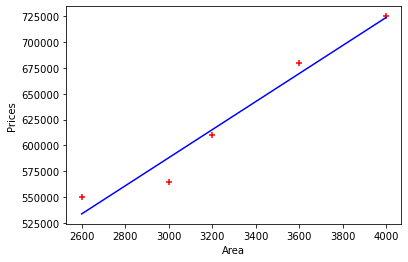

In [67]:
plt.xlabel('Area')
plt.ylabel('Prices')
plt.scatter(df.Area,df.Price,color = 'red' , marker = '+' )
plt.plot(df.Area,reg.predict(df[['Area']]),color = 'blue')

In [43]:
reg.predict([[5000]])

array([859554.79452055])

#### Making a csv of area and its predictions

In [48]:
d = pd.read_csv('predic.csv')
d.head()

,Area
0,1000
1,1500
2,2300
3,3540
4,4120


In [50]:
p = reg.predict(d)

In [74]:
d['Prices Predicted'] = p
d.to_csv('predicted.csv',index=False)

In [75]:
d1 = pd.read_csv('canada_per_capita_income.csv')
d1.head(3)

,year,per_capita_income
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484


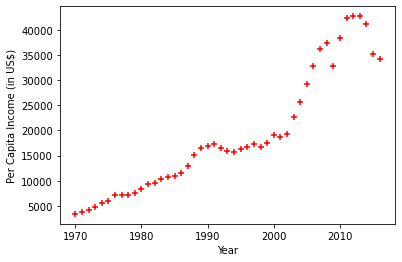

In [79]:
plt.xlabel('Year')
plt.ylabel('Per Capita Income (in US$)')
plt.scatter(d1.year,d1.per_capita_income,color = 'red',marker = '+')

In [80]:
reg1 = linear_model.LinearRegression()
reg1.fit(d1[['year']],d1.per_capita_income)

LinearRegression()

In [82]:
reg1.predict([[2020]])

array([41288.69409442])

## Linear Regression For 2 Variable

In [98]:
d2 = pd.read_csv('homeprices.csv')
d2

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [90]:
import math
median_bedrooms = math.floor(d2.bedrooms.median())
median_bedrooms

3

In [101]:
d2.bedrooms = d2.bedrooms.fillna(median_bedrooms)
d2

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,3.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [104]:
reg = linear_model.LinearRegression()
reg.fit(d2[['area','bedrooms','age']],d2.price)

LinearRegression()

In [105]:
reg.coef_

array([   137.25, -26025.  ,  -6825.  ])

In [117]:
reg.predict([[3000,3,40]])

array([444400.])

In [116]:
reg.predict([[2500,4,5]])

array([588625.])

### Gradient Descent And Cost Function

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def gradient(x,y):
    iterations = 1000
    m_curr = b_curr = 0
    n = len(x)
    learning_rate = 0.01
    plt.scatter(x,y,color='red',marker='+')
    print(f"At learning rate {learning_rate} \n")

    for i in range(iterations):
        y_predicted = m_curr*x + b_curr
        plt.plot(x,y_predicted,color='blue')

        cost = (1/n)*sum([val**2 for val in (y - y_predicted)])
        md = -(2/n)*sum(x*(y-y_predicted))
        bd = -(2/n)*sum((y-y_predicted))
        m_curr = m_curr - learning_rate*md
        b_curr = b_curr - learning_rate*bd
#         print(f"M = {m_curr},B = {b_curr},Cost = {cost},Iteration = {i}")
        



At learning rate 0.01 



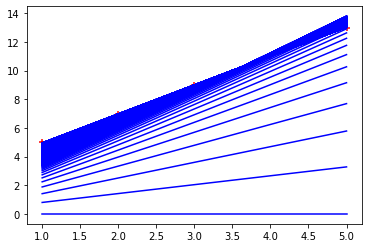

In [12]:
x = np.array([1,2,3,4,5])
y = np.array([5,7,9,11,13])

gradient(x,y)

In [15]:
import pandas as pd

d3 = pd.read_csv('test_scores.csv')
d3

,name,math,cs
0,david,92,98
1,laura,56,68
2,sanjay,88,81
3,wei,70,80
4,jeff,80,83
5,aamir,49,52
6,venkat,65,66
7,virat,35,30
8,arthur,66,68
9,paul,67,73


In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import math

def prediction():
    df = pd.read_csv('test_scores.csv')
    rep = linear_model.LinearRegression()
    rep.fit(df[['math']], df.cs)
    return rep.coef_ , rep.intercept_

def gradient(x,y):
    m_curr = b_curr = 0
    learning_rate = 0.0002
    iterations = 10000
    n = len(x)
    
    cost_previous = 0
     
    for i in range(iterations):
        y_predicted = m_curr * x + b_curr
        
        cost = (1/n)*sum([value**2 for value in (y-y_predicted)])
        md = -(2/n)*sum(x*(y-y_predicted))
        bd = -(2/n)*sum(y-y_predicted)
        m_curr = m_curr - learning_rate * md
        b_curr = b_curr - learning_rate * bd
        
        if math.isclose(cost,cost_previous,rel_tol = 1e-20):
            break
        cost = cost_previous
        print(f"\n m = {m_curr}")
        print(f"b = {b_curr}")
        print(f"cost = {cost}")
        print(f"i = {i} \n")
        
    return m_curr,b_curr
        

if __name__ == "__main__":
    df = pd.read_csv('test_scores.csv')
    x = np.array(df.math)
    y = np.array(df.cs)
    
    
    m,b = gradient(x,y)
    print("Using gradient : ")
    print(f"m is {m}")
    print(f"b is {b}\n")
    
    
    m1,b1 = prediction()
    print("Using prediction : ")
    print(f"m is {m1}")
    print(f"b is {b1}\n")
        
        




 m = 1.9783600000000003
b = 0.027960000000000002
cost = 0
i = 0 


 m = 0.20975041279999962
b = 0.0030470367999999894
cost = 0
i = 1 


 m = 1.7908456142986242
b = 0.025401286955264
cost = 0
i = 2 


 m = 0.37738163667530467
b = 0.005499731626422651
cost = 0
i = 3 


 m = 1.6409848166378898
b = 0.023373894401807944
cost = 0
i = 4 


 m = 0.5113514173939655
b = 0.0074774305434828076
cost = 0
i = 5 


 m = 1.5212165764726306
b = 0.021771129698498662
cost = 0
i = 6 


 m = 0.6184191426785134
b = 0.009075514323270572
cost = 0
i = 7 


 m = 1.4254981563597626
b = 0.020507724625171385
cost = 0
i = 8 


 m = 0.7039868810749315
b = 0.010370210797388455
cost = 0
i = 9 


 m = 1.3490002310389348
b = 0.01951553325074733
cost = 0
i = 10 


 m = 0.7723719384951477
b = 0.01142244086408669
cost = 0
i = 11 


 m = 1.2878632281408475
b = 0.018740093691150705
cost = 0
i = 12 


 m = 0.8270246840299113
b = 0.012280892197750798
cost = 0
i = 13 


 m = 1.2390025969113474
b = 0.01813788028359247
cost = 0
i


 m = 1.0443860871232975
b = 0.02661366938971283
cost = 0
i = 272 


 m = 1.0443854753005282
b = 0.026657027674022435
cost = 0
i = 273 


 m = 1.0443848634919983
b = 0.026700384962922714
cost = 0
i = 274 


 m = 1.044384251697341
b = 0.02674374125643135
cost = 0
i = 275 


 m = 1.0443836399168844
b = 0.02678709655457583
cost = 0
i = 276 


 m = 1.044383028150334
b = 0.026830450857374847
cost = 0
i = 277 


 m = 1.0443824163979525
b = 0.026873804164854975
cost = 0
i = 278 


 m = 1.0443818046595048
b = 0.026917156477035745
cost = 0
i = 279 


 m = 1.0443811929352
b = 0.02696050779394296
cost = 0
i = 280 


 m = 1.044380581224851
b = 0.02700385811559684
cost = 0
i = 281 


 m = 1.0443799695286244
b = 0.027047207442022582
cost = 0
i = 282 


 m = 1.0443793578463703
b = 0.02709055577324093
cost = 0
i = 283 


 m = 1.0443787461782226
b = 0.02713390310927662
cost = 0
i = 284 


 m = 1.0443781345240606
b = 0.027177249450150803
cost = 0
i = 285 


 m = 1.0443775228839915
b = 0.0272205947958878



 m = 1.0442335678133472
b = 0.03742231698355372
cost = 0
i = 522 


 m = 1.0442329594921924
b = 0.03746542712478766
cost = 0
i = 523 


 m = 1.0442323511850025
b = 0.03750853627630637
cost = 0
i = 524 


 m = 1.044231742891779
b = 0.03755164443813258
cost = 0
i = 525 


 m = 1.0442311346125193
b = 0.037594751610288996
cost = 0
i = 526 


 m = 1.044230526347226
b = 0.037637857792798365
cost = 0
i = 527 


 m = 1.0442299180958952
b = 0.03768096298568337
cost = 0
i = 528 


 m = 1.0442293098585305
b = 0.03772406718896677
cost = 0
i = 529 


 m = 1.0442287016351282
b = 0.03776717040267125
cost = 0
i = 530 


 m = 1.04422809342569
b = 0.03781027262681956
cost = 0
i = 531 


 m = 1.044227485230215
b = 0.0378533738614344
cost = 0
i = 532 


 m = 1.0442268770487024
b = 0.03789647410653848
cost = 0
i = 533 


 m = 1.044226268881153
b = 0.03793957336215454
cost = 0
i = 534 


 m = 1.044225660727565
b = 0.03798267162830527
cost = 0
i = 535 


 m = 1.0442250525879397
b = 0.03802576890501341
cost

i = 771 


 m = 1.0440819213841814
b = 0.04816910578579585
cost = 0
i = 772 


 m = 1.0440813165444989
b = 0.0482119692040962
cost = 0
i = 773 


 m = 1.0440807117187025
b = 0.048254831638345555
cost = 0
i = 774 


 m = 1.0440801069067909
b = 0.04829769308856648
cost = 0
i = 775 


 m = 1.0440795021087652
b = 0.048340553554781604
cost = 0
i = 776 


 m = 1.0440788973246238
b = 0.04838341303701348
cost = 0
i = 777 


 m = 1.044078292554367
b = 0.048426271535284726
cost = 0
i = 778 


 m = 1.0440776877979947
b = 0.04846912904961792
cost = 0
i = 779 


 m = 1.0440770830555062
b = 0.04851198558003565
cost = 0
i = 780 


 m = 1.0440764783269012
b = 0.04855484112656051
cost = 0
i = 781 


 m = 1.0440758736121794
b = 0.04859769568921509
cost = 0
i = 782 


 m = 1.0440752689113408
b = 0.04864054926802197
cost = 0
i = 783 


 m = 1.0440746642243843
b = 0.04868340186300373
cost = 0
i = 784 


 m = 1.0440740595513107
b = 0.04872625347418298
cost = 0
i = 785 


 m = 1.0440734548921184
b = 0.048769

cost = 0
i = 1021 


 m = 1.0439311428401767
b = 0.058854389819461596
cost = 0
i = 1022 


 m = 1.0439305414620421
b = 0.05889700792684429
cost = 0
i = 1023 


 m = 1.0439299400977138
b = 0.058939625055807784
cost = 0
i = 1024 


 m = 1.0439293387471917
b = 0.05898224120637455
cost = 0
i = 1025 


 m = 1.043928737410475
b = 0.05902485637856703
cost = 0
i = 1026 


 m = 1.043928136087564
b = 0.05906747057240771
cost = 0
i = 1027 


 m = 1.0439275347784582
b = 0.059110083787919036
cost = 0
i = 1028 


 m = 1.0439269334831567
b = 0.059152696025123463
cost = 0
i = 1029 


 m = 1.0439263322016599
b = 0.059195307284043465
cost = 0
i = 1030 


 m = 1.0439257309339671
b = 0.059237917564701495
cost = 0
i = 1031 


 m = 1.0439251296800782
b = 0.059280526867120015
cost = 0
i = 1032 


 m = 1.0439245284399925
b = 0.05932313519132148
cost = 0
i = 1033 


 m = 1.0439239272137106
b = 0.05936574253732835
cost = 0
i = 1034 


 m = 1.0439233260012308
b = 0.05940834890516307
cost = 0
i = 1035 


 m = 1.0

cost = 0
i = 1271 


 m = 1.0437812272143538
b = 0.06947852108147103
cost = 0
i = 1272 


 m = 1.0437806292779566
b = 0.0695208952818709
cost = 0
i = 1273 


 m = 1.0437800313552865
b = 0.06956326850945116
cost = 0
i = 1274 


 m = 1.0437794334463433
b = 0.06960564076423412
cost = 0
i = 1275 


 m = 1.0437788355511273
b = 0.06964801204624213
cost = 0
i = 1276 


 m = 1.043778237669637
b = 0.06969038235549752
cost = 0
i = 1277 


 m = 1.0437776398018734
b = 0.06973275169202262
cost = 0
i = 1278 


 m = 1.043777041947835
b = 0.06977512005583975
cost = 0
i = 1279 


 m = 1.0437764441075228
b = 0.06981748744697126
cost = 0
i = 1280 


 m = 1.0437758462809348
b = 0.06985985386543947
cost = 0
i = 1281 


 m = 1.043775248468072
b = 0.06990221931126672
cost = 0
i = 1282 


 m = 1.043774650668934
b = 0.06994458378447534
cost = 0
i = 1283 


 m = 1.0437740528835193
b = 0.06998694728508763
cost = 0
i = 1284 


 m = 1.0437734551118296
b = 0.07002930981312595
cost = 0
i = 1285 


 m = 1.04377285735


 m = 1.0436030544098127
b = 0.08210516525132393
cost = 0
i = 1571 


 m = 1.043602460563876
b = 0.0821472495713932
cost = 0
i = 1572 


 m = 1.0436018667315727
b = 0.08218933292529788
cost = 0
i = 1573 


 m = 1.0436012729129027
b = 0.08223141531306014
cost = 0
i = 1574 


 m = 1.0436006791078651
b = 0.08227349673470215
cost = 0
i = 1575 


 m = 1.0436000853164604
b = 0.08231557719024611
cost = 0
i = 1576 


 m = 1.0435994915386877
b = 0.08235765667971419
cost = 0
i = 1577 


 m = 1.0435988977745467
b = 0.08239973520312857
cost = 0
i = 1578 


 m = 1.0435983040240375
b = 0.08244181276051143
cost = 0
i = 1579 


 m = 1.0435977102871592
b = 0.08248388935188494
cost = 0
i = 1580 


 m = 1.0435971165639122
b = 0.0825259649772713
cost = 0
i = 1581 


 m = 1.0435965228542956
b = 0.08256803963669265
cost = 0
i = 1582 


 m = 1.0435959291583088
b = 0.0826101133301712
cost = 0
i = 1583 


 m = 1.0435953354759528
b = 0.08265218605772912
cost = 0
i = 1584 


 m = 1.043594741807226
b = 0.08269425


 m = 1.0434390791411852
b = 0.09372566690391178
cost = 0
i = 1848 


 m = 1.0434384890597646
b = 0.09376748444249774
cost = 0
i = 1849 


 m = 1.0434378989918909
b = 0.09380930102104384
cost = 0
i = 1850 


 m = 1.0434373089375641
b = 0.0938511166395721
cost = 0
i = 1851 


 m = 1.0434367188967832
b = 0.09389293129810455
cost = 0
i = 1852 


 m = 1.043436128869549
b = 0.09393474499666327
cost = 0
i = 1853 


 m = 1.0434355388558603
b = 0.09397655773527025
cost = 0
i = 1854 


 m = 1.0434349488557169
b = 0.09401836951394756
cost = 0
i = 1855 


 m = 1.0434343588691186
b = 0.09406018033271722
cost = 0
i = 1856 


 m = 1.0434337688960653
b = 0.09410199019160129
cost = 0
i = 1857 


 m = 1.0434331789365563
b = 0.09414379909062177
cost = 0
i = 1858 


 m = 1.043432588990592
b = 0.09418560702980074
cost = 0
i = 1859 


 m = 1.0434319990581706
b = 0.0942274140091602
cost = 0
i = 1860 


 m = 1.043431409139294
b = 0.09426922002872222
cost = 0
i = 1861 


 m = 1.0434308192339594
b = 0.09431102


 m = 1.043299021139704
b = 0.10365121391654329
cost = 0
i = 2086 


 m = 1.0432984342737104
b = 0.10369280358612379
cost = 0
i = 2087 


 m = 1.0432978474211911
b = 0.1037343923008958
cost = 0
i = 2088 


 m = 1.0432972605821438
b = 0.10377598006088122
cost = 0
i = 2089 


 m = 1.0432966737565694
b = 0.10381756686610198
cost = 0
i = 2090 


 m = 1.0432960869444674
b = 0.10385915271658
cost = 0
i = 2091 


 m = 1.0432955001458368
b = 0.1039007376123372
cost = 0
i = 2092 


 m = 1.0432949133606786
b = 0.10394232155339551
cost = 0
i = 2093 


 m = 1.0432943265889911
b = 0.10398390453977682
cost = 0
i = 2094 


 m = 1.0432937398307747
b = 0.10402548657150307
cost = 0
i = 2095 


 m = 1.0432931530860292
b = 0.10406706764859616
cost = 0
i = 2096 


 m = 1.0432925663547536
b = 0.10410864777107802
cost = 0
i = 2097 


 m = 1.0432919796369489
b = 0.10415022693897057
cost = 0
i = 2098 


 m = 1.0432913929326133
b = 0.1041918051522957
cost = 0
i = 2099 


 m = 1.0432908062417474
b = 0.1042333824

b = 0.11443244298474069
cost = 0
i = 2346 


 m = 1.0431463053554129
b = 0.11447378514071388
cost = 0
i = 2347 


 m = 1.0431457219954432
b = 0.11451512634756096
cost = 0
i = 2348 


 m = 1.0431451386488653
b = 0.11455646660530369
cost = 0
i = 2349 


 m = 1.0431445553156802
b = 0.11459780591396389
cost = 0
i = 2350 


 m = 1.043143971995887
b = 0.11463914427356332
cost = 0
i = 2351 


 m = 1.0431433886894856
b = 0.1146804816841238
cost = 0
i = 2352 


 m = 1.043142805396476
b = 0.11472181814566709
cost = 0
i = 2353 


 m = 1.043142222116857
b = 0.11476315365821499
cost = 0
i = 2354 


 m = 1.0431416388506292
b = 0.11480448822178929
cost = 0
i = 2355 


 m = 1.0431410555977916
b = 0.11484582183641176
cost = 0
i = 2356 


 m = 1.0431404723583446
b = 0.11488715450210421
cost = 0
i = 2357 


 m = 1.0431398891322872
b = 0.1149284862188884
cost = 0
i = 2358 


 m = 1.0431393059196195
b = 0.11496981698678614
cost = 0
i = 2359 


 m = 1.0431387227203412
b = 0.1150111468058192
cost = 0
i = 236

cost = 0
i = 2590 


 m = 1.0430043618277383
b = 0.1245329545003796
cost = 0
i = 2591 


 m = 1.0430037817264828
b = 0.12457406477054228
cost = 0
i = 2592 


 m = 1.0430032016385462
b = 0.12461517409690244
cost = 0
i = 2593 


 m = 1.0430026215639259
b = 0.12465628247948173
cost = 0
i = 2594 


 m = 1.0430020415026242
b = 0.12469738991830183
cost = 0
i = 2595 


 m = 1.0430014614546381
b = 0.12473849641338439
cost = 0
i = 2596 


 m = 1.0430008814199696
b = 0.1247796019647511
cost = 0
i = 2597 


 m = 1.043000301398617
b = 0.12482070657242361
cost = 0
i = 2598 


 m = 1.0429997213905806
b = 0.12486181023642359
cost = 0
i = 2599 


 m = 1.04299914139586
b = 0.12490291295677271
cost = 0
i = 2600 


 m = 1.0429985614144548
b = 0.12494401473349262
cost = 0
i = 2601 


 m = 1.0429979814463644
b = 0.12498511556660499
cost = 0
i = 2602 


 m = 1.0429974014915893
b = 0.1250262154561315
cost = 0
i = 2603 


 m = 1.042996821550128
b = 0.12506731440209376
cost = 0
i = 2604 


 m = 1.0429962416219

i = 2875 


 m = 1.042839570778679
b = 0.13621126839462894
cost = 0
i = 2876 


 m = 1.0428389944606677
b = 0.1362521105560648
cost = 0
i = 2877 


 m = 1.0428384181558892
b = 0.13629295177985332
cost = 0
i = 2878 


 m = 1.0428378418643398
b = 0.136333792066016
cost = 0
i = 2879 


 m = 1.042837265586022
b = 0.13637463141457445
cost = 0
i = 2880 


 m = 1.0428366893209333
b = 0.1364154698255501
cost = 0
i = 2881 


 m = 1.0428361130690753
b = 0.13645630729896455
cost = 0
i = 2882 


 m = 1.0428355368304458
b = 0.13649714383483927
cost = 0
i = 2883 


 m = 1.0428349606050467
b = 0.13653797943319582
cost = 0
i = 2884 


 m = 1.0428343843928751
b = 0.1365788140940557
cost = 0
i = 2885 


 m = 1.0428338081939337
b = 0.13661964781744046
cost = 0
i = 2886 


 m = 1.042833232008219
b = 0.13666048060337158
cost = 0
i = 2887 


 m = 1.0428326558357335
b = 0.13670131245187062
cost = 0
i = 2888 


 m = 1.0428320796764745
b = 0.13674214336295906
cost = 0
i = 2889 


 m = 1.042831503530444
b = 0.1

cost = 0
i = 3145 


 m = 1.042684444416071
b = 0.1472046710469245
cost = 0
i = 3146 


 m = 1.0426838716594253
b = 0.1472452608237083
cost = 0
i = 3147 


 m = 1.042683298915928
b = 0.14728584966863897
cost = 0
i = 3148 


 m = 1.0426827261855807
b = 0.1473264375817379
cost = 0
i = 3149 


 m = 1.042682153468381
b = 0.1473670245630265
cost = 0
i = 3150 


 m = 1.0426815807643308
b = 0.14740761061252616
cost = 0
i = 3151 


 m = 1.0426810080734272
b = 0.14744819573025822
cost = 0
i = 3152 


 m = 1.0426804353956727
b = 0.14748877991624415
cost = 0
i = 3153 


 m = 1.042679862731065
b = 0.14752936317050527
cost = 0
i = 3154 


 m = 1.0426792900796045
b = 0.14756994549306302
cost = 0
i = 3155 


 m = 1.0426787174412908
b = 0.14761052688393875
cost = 0
i = 3156 


 m = 1.0426781448161238
b = 0.14765110734315387
cost = 0
i = 3157 


 m = 1.0426775722041028
b = 0.14769168687072978
cost = 0
i = 3158 


 m = 1.0426769996052279
b = 0.14773226546668786
cost = 0
i = 3159 


 m = 1.04267642701949

 m = 1.0425200327467332
b = 0.1588560992850671
cost = 0
i = 3434 


 m = 1.0425194637646225
b = 0.15889642157036038
cost = 0
i = 3435 


 m = 1.0425188947955732
b = 0.15893674292994153
cost = 0
i = 3436 


 m = 1.0425183258395878
b = 0.15897706336383183
cost = 0
i = 3437 


 m = 1.0425177568966626
b = 0.1590173828720525
cost = 0
i = 3438 


 m = 1.0425171879668012
b = 0.15905770145462486
cost = 0
i = 3439 


 m = 1.0425166190499988
b = 0.1590980191115701
cost = 0
i = 3440 


 m = 1.04251605014626
b = 0.15913833584290948
cost = 0
i = 3441 


 m = 1.0425154812555795
b = 0.15917865164866427
cost = 0
i = 3442 


 m = 1.042514912377962
b = 0.15921896652885573
cost = 0
i = 3443 


 m = 1.042514343513402
b = 0.15925928048350504
cost = 0
i = 3444 


 m = 1.0425137746619044
b = 0.15929959351263354
cost = 0
i = 3445 


 m = 1.0425132058234647
b = 0.1593399056162624
cost = 0
i = 3446 


 m = 1.0425126369980853
b = 0.15938021679441292
cost = 0
i = 3447 


 m = 1.0425120681857643
b = 0.159420527047

b = 0.17235242097580475
cost = 0
i = 3770 


 m = 1.0423290234347844
b = 0.1723924334148601
cost = 0
i = 3771 


 m = 1.0423284588378317
b = 0.17243244493531673
cost = 0
i = 3772 


 m = 1.042327894253842
b = 0.17247245553719576
cost = 0
i = 3773 


 m = 1.042327329682813
b = 0.17251246522051822
cost = 0
i = 3774 


 m = 1.0423267651247459
b = 0.17255247398530524
cost = 0
i = 3775 


 m = 1.0423262005796397
b = 0.1725924818315779
cost = 0
i = 3776 


 m = 1.0423256360474944
b = 0.1726324887593573
cost = 0
i = 3777 


 m = 1.042325071528309
b = 0.1726724947686645
cost = 0
i = 3778 


 m = 1.0423245070220843
b = 0.1727124998595206
cost = 0
i = 3779 


 m = 1.042323942528819
b = 0.17275250403194672
cost = 0
i = 3780 


 m = 1.0423233780485135
b = 0.1727925072859639
cost = 0
i = 3781 


 m = 1.0423228135811675
b = 0.17283250962159324
cost = 0
i = 3782 


 m = 1.0423222491267796
b = 0.17287251103885581
cost = 0
i = 3783 


 m = 1.0423216846853514
b = 0.1729125115377727
cost = 0
i = 3784 




i = 4029 


 m = 1.0421832250444152
b = 0.18272478688743865
cost = 0
i = 4030 


 m = 1.0421826637946783
b = 0.1827645611994969
cost = 0
i = 4031 


 m = 1.042182102557825
b = 0.18280433459842332
cost = 0
i = 4032 


 m = 1.0421815413338575
b = 0.18284410708423887
cost = 0
i = 4033 


 m = 1.0421809801227742
b = 0.1828838786569645
cost = 0
i = 4034 


 m = 1.042180418924575
b = 0.1829236493166212
cost = 0
i = 4035 


 m = 1.0421798577392598
b = 0.1829634190632299
cost = 0
i = 4036 


 m = 1.042179296566828
b = 0.1830031878968116
cost = 0
i = 4037 


 m = 1.0421787354072796
b = 0.18304295581738725
cost = 0
i = 4038 


 m = 1.0421781742606144
b = 0.18308272282497778
cost = 0
i = 4039 


 m = 1.0421776131268314
b = 0.18312248891960417
cost = 0
i = 4040 


 m = 1.0421770520059315
b = 0.1831622541012874
cost = 0
i = 4041 


 m = 1.0421764908979132
b = 0.18320201837004838
cost = 0
i = 4042 


 m = 1.042175929802777
b = 0.1832417817259081
cost = 0
i = 4043 


 m = 1.042175368720522
b = 0.1832

 m = 1.0419925838976711
b = 0.19623503010485152
cost = 0
i = 4371 


 m = 1.0419920270246394
b = 0.1962744942510638
cost = 0
i = 4372 


 m = 1.041991470164394
b = 0.196313957491265
cost = 0
i = 4373 


 m = 1.041990913316931
b = 0.1963534198254759
cost = 0
i = 4374 


 m = 1.041990356482254
b = 0.19639288125371732
cost = 0
i = 4375 


 m = 1.0419897996603587
b = 0.19643234177601002
cost = 0
i = 4376 


 m = 1.0419892428512485
b = 0.19647180139237483
cost = 0
i = 4377 


 m = 1.04198868605492
b = 0.1965112601028325
cost = 0
i = 4378 


 m = 1.0419881292713757
b = 0.19655071790740392
cost = 0
i = 4379 


 m = 1.041987572500613
b = 0.1965901748061098
cost = 0
i = 4380 


 m = 1.0419870157426332
b = 0.19662963079897097
cost = 0
i = 4381 


 m = 1.0419864589974346
b = 0.19666908588600823
cost = 0
i = 4382 


 m = 1.0419859022650182
b = 0.19670854006724237
cost = 0
i = 4383 


 m = 1.041985345545383
b = 0.1967479933426942
cost = 0
i = 4384 


 m = 1.041984788838529
b = 0.1967874457123845
co

cost = 0
i = 4568 


 m = 1.041882572001944
b = 0.20403128759413938
cost = 0
i = 4569 


 m = 1.0418820176545476
b = 0.2040705727552098
cost = 0
i = 4570 


 m = 1.041881463319877
b = 0.2041098570143782
cost = 0
i = 4571 


 m = 1.041880908997934
b = 0.20414914037166534
cost = 0
i = 4572 


 m = 1.0418803546887152
b = 0.20418842282709188
cost = 0
i = 4573 


 m = 1.0418798003922243
b = 0.20422770438067858
cost = 0
i = 4574 


 m = 1.0418792461084565
b = 0.20426698503244609
cost = 0
i = 4575 


 m = 1.0418786918374163
b = 0.20430626478241515
cost = 0
i = 4576 


 m = 1.0418781375790986
b = 0.20434554363060642
cost = 0
i = 4577 


 m = 1.0418775833335074
b = 0.20438482157704066
cost = 0
i = 4578 


 m = 1.0418770291006394
b = 0.20442409862173852
cost = 0
i = 4579 


 m = 1.0418764748804956
b = 0.20446337476472073
cost = 0
i = 4580 


 m = 1.0418759206730759
b = 0.204502650006008
cost = 0
i = 4581 


 m = 1.0418753664783789
b = 0.20454192434562102
cost = 0
i = 4582 


 m = 1.0418748122964



 m = 1.0416953754780827
b = 0.21729741932914334
cost = 0
i = 4908 


 m = 1.0416948254283105
b = 0.21733639992863732
cost = 0
i = 4909 


 m = 1.0416942753911684
b = 0.2173753796332214
cost = 0
i = 4910 


 m = 1.041693725366652
b = 0.2174143584429161
cost = 0
i = 4911 


 m = 1.041693175354765
b = 0.21745333635774197
cost = 0
i = 4912 


 m = 1.0416926253555034
b = 0.21749231337771957
cost = 0
i = 4913 


 m = 1.0416920753688694
b = 0.21753128950286943
cost = 0
i = 4914 


 m = 1.0416915253948615
b = 0.2175702647332121
cost = 0
i = 4915 


 m = 1.0416909754334802
b = 0.2176092390687681
cost = 0
i = 4916 


 m = 1.0416904254847246
b = 0.21764821250955801
cost = 0
i = 4917 


 m = 1.0416898755485946
b = 0.21768718505560236
cost = 0
i = 4918 


 m = 1.0416893256250903
b = 0.21772615670692166
cost = 0
i = 4919 


 m = 1.0416887757142104
b = 0.2177651274635365
cost = 0
i = 4920 


 m = 1.0416882258159559
b = 0.21780409732546738
cost = 0
i = 4921 


 m = 1.0416876759303253
b = 0.217843066


 m = 1.0415440399686287
b = 0.2280221740584239
cost = 0
i = 5184 


 m = 1.0415434933931924
b = 0.22806090844083876
cost = 0
i = 5185 


 m = 1.0415429468303041
b = 0.22809964193399632
cost = 0
i = 5186 


 m = 1.0415424002799638
b = 0.228138374537917
cost = 0
i = 5187 


 m = 1.0415418537421712
b = 0.2281771062526212
cost = 0
i = 5188 


 m = 1.0415413072169257
b = 0.22821583707812934
cost = 0
i = 5189 


 m = 1.0415407607042275
b = 0.22825456701446184
cost = 0
i = 5190 


 m = 1.041540214204076
b = 0.2282932960616391
cost = 0
i = 5191 


 m = 1.0415396677164708
b = 0.22833202421968152
cost = 0
i = 5192 


 m = 1.0415391212414118
b = 0.22837075148860955
cost = 0
i = 5193 


 m = 1.0415385747788988
b = 0.2284094778684436
cost = 0
i = 5194 


 m = 1.0415380283289313
b = 0.22844820335920404
cost = 0
i = 5195 


 m = 1.041537481891509
b = 0.22848692796091133
cost = 0
i = 5196 


 m = 1.0415369354666317
b = 0.22852565167358585
cost = 0
i = 5197 


 m = 1.0415363890542995
b = 0.22856437449

cost = 0
i = 5519 


 m = 1.0413610950322532
b = 0.24098700682425298
cost = 0
i = 5520 


 m = 1.0413605526568344
b = 0.24102544356226147
cost = 0
i = 5521 


 m = 1.0413600102938692
b = 0.24106387941784593
cost = 0
i = 5522 


 m = 1.0413594679433535
b = 0.2411023143910266
cost = 0
i = 5523 


 m = 1.041358925605291
b = 0.2411407484818238
cost = 0
i = 5524 


 m = 1.0413583832796776
b = 0.24117918169025768
cost = 0
i = 5525 


 m = 1.0413578409665165
b = 0.24121761401634859
cost = 0
i = 5526 


 m = 1.041357298665804
b = 0.24125604546011672
cost = 0
i = 5527 


 m = 1.0413567563775432
b = 0.24129447602158238
cost = 0
i = 5528 


 m = 1.0413562141017307
b = 0.2413329057007658
cost = 0
i = 5529 


 m = 1.0413556718383692
b = 0.24137133449768725
cost = 0
i = 5530 


 m = 1.041355129587455
b = 0.24140976241236695
cost = 0
i = 5531 


 m = 1.041354587348992
b = 0.2414481894448252
cost = 0
i = 5532 


 m = 1.041354045122975
b = 0.24148661559508222
cost = 0
i = 5533 


 m = 1.041353502909409

cost = 0
i = 5769 


 m = 1.0412258880043717
b = 0.2505687779296408
cost = 0
i = 5770 


 m = 1.0412253487330134
b = 0.2506069946909921
cost = 0
i = 5771 


 m = 1.041224809474036
b = 0.25064521057496963
cost = 0
i = 5772 


 m = 1.0412242702274381
b = 0.2506834255815934
cost = 0
i = 5773 


 m = 1.041223730993221
b = 0.2507216397108836
cost = 0
i = 5774 


 m = 1.0412231917713826
b = 0.2507598529628604
cost = 0
i = 5775 


 m = 1.041222652561925
b = 0.2507980653375439
cost = 0
i = 5776 


 m = 1.0412221133648445
b = 0.25083627683495424
cost = 0
i = 5777 


 m = 1.041221574180145
b = 0.2508744874551116
cost = 0
i = 5778 


 m = 1.041221035007822
b = 0.2509126971980361
cost = 0
i = 5779 


 m = 1.0412204958478788
b = 0.25095090606374787
cost = 0
i = 5780 


 m = 1.041219956700312
b = 0.25098911405226704
cost = 0
i = 5781 


 m = 1.0412194175651246
b = 0.2510273211636138
cost = 0
i = 5782 


 m = 1.0412188784423129
b = 0.25106552739780824
cost = 0
i = 5783 


 m = 1.0412183393318797
b = 

b = 0.26005771284387946
cost = 0
i = 6019 


 m = 1.0410914547775871
b = 0.260095711759891
cost = 0
i = 6020 


 m = 1.041090918592524
b = 0.2601337098035299
cost = 0
i = 6021 


 m = 1.0410903824197704
b = 0.26017170697481623
cost = 0
i = 6022 


 m = 1.041089846259326
b = 0.26020970327377
cost = 0
i = 6023 


 m = 1.0410893101111909
b = 0.2602476987004113
cost = 0
i = 6024 


 m = 1.041088773975365
b = 0.26028569325476014
cost = 0
i = 6025 


 m = 1.0410882378518467
b = 0.2603236869368365
cost = 0
i = 6026 


 m = 1.0410877017406373
b = 0.2603616797466604
cost = 0
i = 6027 


 m = 1.0410871656417358
b = 0.26039967168425193
cost = 0
i = 6028 


 m = 1.0410866295551415
b = 0.26043766274963104
cost = 0
i = 6029 


 m = 1.0410860934808552
b = 0.2604756529428178
cost = 0
i = 6030 


 m = 1.0410855574188758
b = 0.2605136422638322
cost = 0
i = 6031 


 m = 1.041085021369203
b = 0.2605516307126943
cost = 0
i = 6032 


 m = 1.041084485331837
b = 0.2605896182894241
cost = 0
i = 6033 


 m = 1.

 m = 1.040941270003962
b = 0.27073891682803986
cost = 0
i = 6301 


 m = 1.0409407372668145
b = 0.27077667052680277
cost = 0
i = 6302 


 m = 1.0409402045418985
b = 0.2708144233588228
cost = 0
i = 6303 


 m = 1.0409396718292117
b = 0.2708521753241197
cost = 0
i = 6304 


 m = 1.040939139128756
b = 0.27088992642271353
cost = 0
i = 6305 


 m = 1.0409386064405288
b = 0.2709276766546241
cost = 0
i = 6306 


 m = 1.040938073764532
b = 0.2709654260198713
cost = 0
i = 6307 


 m = 1.0409375411007633
b = 0.27100317451847505
cost = 0
i = 6308 


 m = 1.0409370084492244
b = 0.2710409221504553
cost = 0
i = 6309 


 m = 1.0409364758099127
b = 0.2710786689158318
cost = 0
i = 6310 


 m = 1.040935943182831
b = 0.2711164148146246
cost = 0
i = 6311 


 m = 1.0409354105679756
b = 0.27115415984685354
cost = 0
i = 6312 


 m = 1.0409348779653491
b = 0.2711919040125385
cost = 0
i = 6313 


 m = 1.0409343453749489
b = 0.27122964731169935
cost = 0
i = 6314 


 m = 1.040933812796777
b = 0.27126738974435605

 m = 1.0407946977267208
b = 0.2811261136544514
cost = 0
i = 6577 


 m = 1.0407941683545554
b = 0.28116362888573165
cost = 0
i = 6578 


 m = 1.0407936389945425
b = 0.28120114325574364
cost = 0
i = 6579 


 m = 1.0407931096466834
b = 0.28123865676450716
cost = 0
i = 6580 


 m = 1.040792580310976
b = 0.281276169412042
cost = 0
i = 6581 


 m = 1.040792050987422
b = 0.28131368119836786
cost = 0
i = 6582 


 m = 1.0407915216760193
b = 0.2813511921235046
cost = 0
i = 6583 


 m = 1.040790992376769
b = 0.281388702187472
cost = 0
i = 6584 


 m = 1.04079046308967
b = 0.2814262113902897
cost = 0
i = 6585 


 m = 1.0407899338147224
b = 0.28146371973197765
cost = 0
i = 6586 


 m = 1.0407894045519257
b = 0.2815012272125555
cost = 0
i = 6587 


 m = 1.0407888753012797
b = 0.28153873383204303
cost = 0
i = 6588 


 m = 1.0407883460627845
b = 0.28157623959046
cost = 0
i = 6589 


 m = 1.0407878168364386
b = 0.2816137444878262
cost = 0
i = 6590 


 m = 1.0407872876222437
b = 0.28165124852416146
cos

i = 6889 


 m = 1.0406295962472183
b = 0.29282642694846056
cost = 0
i = 6890 


 m = 1.0406290706654227
b = 0.2928636735659555
cost = 0
i = 6891 


 m = 1.0406285450956958
b = 0.292900919328349
cost = 0
i = 6892 


 m = 1.0406280195380329
b = 0.29293816423566066
cost = 0
i = 6893 


 m = 1.040627493992437
b = 0.29297540828791013
cost = 0
i = 6894 


 m = 1.0406269684589053
b = 0.29301265148511707
cost = 0
i = 6895 


 m = 1.0406264429374399
b = 0.29304989382730107
cost = 0
i = 6896 


 m = 1.0406259174280381
b = 0.2930871353144818
cost = 0
i = 6897 


 m = 1.0406253919307022
b = 0.2931243759466788
cost = 0
i = 6898 


 m = 1.0406248664454292
b = 0.29316161572391175
cost = 0
i = 6899 


 m = 1.0406243409722213
b = 0.2931988546462003
cost = 0
i = 6900 


 m = 1.0406238155110765
b = 0.2932360927135641
cost = 0
i = 6901 


 m = 1.0406232900619954
b = 0.29327332992602273
cost = 0
i = 6902 


 m = 1.0406227646249775
b = 0.2933105662835958
cost = 0
i = 6903 


 m = 1.0406222392000224
b = 0.2

b = 0.30100011772588536
cost = 0
i = 7110 


 m = 1.0405137355094216
b = 0.30103717669318975
cost = 0
i = 7111 


 m = 1.040513212587539
b = 0.30107423480970075
cost = 0
i = 7112 


 m = 1.04051268967766
b = 0.3011112920754378
cost = 0
i = 7113 


 m = 1.0405121667797874
b = 0.30114834849042055
cost = 0
i = 7114 


 m = 1.0405116438939181
b = 0.3011854040546685
cost = 0
i = 7115 


 m = 1.0405111210200542
b = 0.30122245876820114
cost = 0
i = 7116 


 m = 1.0405105981581935
b = 0.301259512631038
cost = 0
i = 7117 


 m = 1.040510075308337
b = 0.3012965656431987
cost = 0
i = 7118 


 m = 1.040509552470484
b = 0.30133361780470264
cost = 0
i = 7119 


 m = 1.040509029644634
b = 0.3013706691155694
cost = 0
i = 7120 


 m = 1.040508506830787
b = 0.3014077195758186
cost = 0
i = 7121 


 m = 1.0405079840289426
b = 0.30144476918546964
cost = 0
i = 7122 


 m = 1.0405074612391012
b = 0.3014818179445421
cost = 0
i = 7123 


 m = 1.0405069384612609
b = 0.3015188658530555
cost = 0
i = 7124 


 m = 

b = 0.31053318011376696
cost = 0
i = 7368 


 m = 1.0403792188917007
b = 0.31057002022266056
cost = 0
i = 7369 


 m = 1.0403786990580268
b = 0.31060685948578526
cost = 0
i = 7370 


 m = 1.040378179236287
b = 0.3106436979031605
cost = 0
i = 7371 


 m = 1.0403776594264815
b = 0.3106805354748056
cost = 0
i = 7372 


 m = 1.0403771396286092
b = 0.3107173722007401
cost = 0
i = 7373 


 m = 1.040376619842671
b = 0.31075420808098336
cost = 0
i = 7374 


 m = 1.0403761000686655
b = 0.3107910431155548
cost = 0
i = 7375 


 m = 1.0403755803065928
b = 0.3108278773044738
cost = 0
i = 7376 


 m = 1.040375060556453
b = 0.31086471064775983
cost = 0
i = 7377 


 m = 1.0403745408182454
b = 0.3109015431454323
cost = 0
i = 7378 


 m = 1.0403740210919699
b = 0.3109383747975106
cost = 0
i = 7379 


 m = 1.0403735013776263
b = 0.31097520560401415
cost = 0
i = 7380 


 m = 1.040372981675214
b = 0.3110120355649624
cost = 0
i = 7381 


 m = 1.040372461984733
b = 0.3110488646803747
cost = 0
i = 7382 


 m 

cost = 0
i = 7643 


 m = 1.0402367133164558
b = 0.32066902043466106
cost = 0
i = 7644 


 m = 1.040236196754401
b = 0.3207056278466715
cost = 0
i = 7645 


 m = 1.040235680204204
b = 0.3207422344182552
cost = 0
i = 7646 


 m = 1.0402351636658673
b = 0.3207788401494316
cost = 0
i = 7647 


 m = 1.0402346471393882
b = 0.32081544504021986
cost = 0
i = 7648 


 m = 1.040234130624768
b = 0.3208520490906393
cost = 0
i = 7649 


 m = 1.0402336141220057
b = 0.32088865230070923
cost = 0
i = 7650 


 m = 1.0402330976311007
b = 0.32092525467044897
cost = 0
i = 7651 


 m = 1.040232581152054
b = 0.32096185619987777
cost = 0
i = 7652 


 m = 1.0402320646848637
b = 0.32099845688901496
cost = 0
i = 7653 


 m = 1.0402315482295315
b = 0.3210350567378798
cost = 0
i = 7654 


 m = 1.0402310317860546
b = 0.32107165574649155
cost = 0
i = 7655 


 m = 1.0402305153544353
b = 0.3211082539148696
cost = 0
i = 7656 


 m = 1.040229998934671
b = 0.3211448512430331
cost = 0
i = 7657 


 m = 1.040229482526764
b 

 m = 1.0400786845033814
b = 0.33186811221757917
cost = 0
i = 7951 


 m = 1.0400781715693248
b = 0.3319044625227618
cost = 0
i = 7952 


 m = 1.0400776586470433
b = 0.33194081199342035
cost = 0
i = 7953 


 m = 1.0400771457365379
b = 0.331977160629574
cost = 0
i = 7954 


 m = 1.0400766328378075
b = 0.3320135084312419
cost = 0
i = 7955 


 m = 1.0400761199508524
b = 0.33204985539844317
cost = 0
i = 7956 


 m = 1.040075607075672
b = 0.332086201531197
cost = 0
i = 7957 


 m = 1.0400750942122658
b = 0.3321225468295226
cost = 0
i = 7958 


 m = 1.0400745813606345
b = 0.332158891293439
cost = 0
i = 7959 


 m = 1.0400740685207763
b = 0.3321952349229655
cost = 0
i = 7960 


 m = 1.0400735556926928
b = 0.3322315777181212
cost = 0
i = 7961 


 m = 1.0400730428763816
b = 0.33226791967892516
cost = 0
i = 7962 


 m = 1.0400725300718445
b = 0.33230426080539666
cost = 0
i = 7963 


 m = 1.0400720172790796
b = 0.3323406010975548
cost = 0
i = 7964 


 m = 1.0400715044980877
b = 0.3323769405554188



 m = 1.0399574478639038
b = 0.3404598381601487
cost = 0
i = 8188 


 m = 1.0399569377131765
b = 0.34049599121796115
cost = 0
i = 8189 


 m = 1.0399564275741615
b = 0.34053214344577787
cost = 0
i = 8190 


 m = 1.039955917446858
b = 0.34056829484361795
cost = 0
i = 8191 


 m = 1.039955407331266
b = 0.3406044454115005
cost = 0
i = 8192 


 m = 1.0399548972273855
b = 0.34064059514944445
cost = 0
i = 8193 


 m = 1.0399543871352153
b = 0.34067674405746895
cost = 0
i = 8194 


 m = 1.0399538770547558
b = 0.340712892135593
cost = 0
i = 8195 


 m = 1.039953366986007
b = 0.3407490393838357
cost = 0
i = 8196 


 m = 1.039952856928968
b = 0.34078518580221606
cost = 0
i = 8197 


 m = 1.039952346883639
b = 0.34082133139075316
cost = 0
i = 8198 


 m = 1.0399518368500194
b = 0.34085747614946604
cost = 0
i = 8199 


 m = 1.0399513268281089
b = 0.34089362007837376
cost = 0
i = 8200 


 m = 1.0399508168179077
b = 0.34092976317749535
cost = 0
i = 8201 


 m = 1.039950306819415
b = 0.34096590544684

 m = 1.0398201316162219
b = 0.35019108419785067
cost = 0
i = 8458 


 m = 1.0398196246179776
b = 0.3502270138473861
cost = 0
i = 8459 


 m = 1.0398191176313731
b = 0.35026294267205477
cost = 0
i = 8460 


 m = 1.0398186106564076
b = 0.35029887067187565
cost = 0
i = 8461 


 m = 1.0398181036930816
b = 0.35033479784686766
cost = 0
i = 8462 


 m = 1.039817596741394
b = 0.3503707241970498
cost = 0
i = 8463 


 m = 1.039817089801345
b = 0.3504066497224409
cost = 0
i = 8464 


 m = 1.0398165828729344
b = 0.35044257442306
cost = 0
i = 8465 


 m = 1.0398160759561617
b = 0.35047849829892597
cost = 0
i = 8466 


 m = 1.0398155690510267
b = 0.3505144213500578
cost = 0
i = 8467 


 m = 1.039815062157529
b = 0.3505503435764743
cost = 0
i = 8468 


 m = 1.0398145552756686
b = 0.3505862649781945
cost = 0
i = 8469 


 m = 1.0398140484054452
b = 0.3506221855552374
cost = 0
i = 8470 


 m = 1.0398135415468581
b = 0.3506581053076218
cost = 0
i = 8471 


 m = 1.0398130346999082
b = 0.3506940242353667
c



 m = 1.0396927354687548
b = 0.3592193184831868
cost = 0
i = 8710 


 m = 1.03969223139525
b = 0.3592550408640684
cost = 0
i = 8711 


 m = 1.0396917273333166
b = 0.3592907624248417
cost = 0
i = 8712 


 m = 1.0396912232829563
b = 0.35932648316552557
cost = 0
i = 8713 


 m = 1.0396907192441673
b = 0.35936220308613875
cost = 0
i = 8714 


 m = 1.0396902152169505
b = 0.35939792218670014
cost = 0
i = 8715 


 m = 1.0396897112013044
b = 0.35943364046722853
cost = 0
i = 8716 


 m = 1.03968920719723
b = 0.35946935792774276
cost = 0
i = 8717 


 m = 1.0396887032047262
b = 0.3595050745682617
cost = 0
i = 8718 


 m = 1.0396881992237927
b = 0.3595407903888041
cost = 0
i = 8719 


 m = 1.0396876952544298
b = 0.35957650538938885
cost = 0
i = 8720 


 m = 1.039687191296637
b = 0.35961221957003475
cost = 0
i = 8721 


 m = 1.0396866873504138
b = 0.3596479329307606
cost = 0
i = 8722 


 m = 1.0396861834157605
b = 0.3596836454715852
cost = 0
i = 8723 


 m = 1.0396856794926757
b = 0.35971935719252

 m = 1.0395595599800664
b = 0.3686571196793257
cost = 0
i = 8975 


 m = 1.039559058963981
b = 0.36869262538878655
cost = 0
i = 8976 


 m = 1.0395585579593982
b = 0.36872813028311346
cost = 0
i = 8977 


 m = 1.039558056966317
b = 0.3687636343623251
cost = 0
i = 8978 


 m = 1.0395575559847379
b = 0.3687991376264402
cost = 0
i = 8979 


 m = 1.0395570550146598
b = 0.3688346400754774
cost = 0
i = 8980 


 m = 1.0395565540560834
b = 0.3688701417094555
cost = 0
i = 8981 


 m = 1.0395560531090073
b = 0.36890564252839314
cost = 0
i = 8982 


 m = 1.0395555521734325
b = 0.3689411425323091
cost = 0
i = 8983 


 m = 1.0395550512493574
b = 0.368976641721222
cost = 0
i = 8984 


 m = 1.0395545503367831
b = 0.3690121400951507
cost = 0
i = 8985 


 m = 1.039554049435708
b = 0.3690476376541138
cost = 0
i = 8986 


 m = 1.0395535485461334
b = 0.36908313439813006
cost = 0
i = 8987 


 m = 1.0395530476680572
b = 0.36911863032721814
cost = 0
i = 8988 


 m = 1.0395525468014808
b = 0.36915412544139675

 m = 1.0394222129996433
b = 0.37839054366663827
cost = 0
i = 9250 


 m = 1.039421715136746
b = 0.37842582591782115
cost = 0
i = 9251 


 m = 1.0394212172852797
b = 0.3784611073590002
cost = 0
i = 9252 


 m = 1.0394207194452416
b = 0.3784963879901939
cost = 0
i = 9253 


 m = 1.039420221616634
b = 0.378531667811421
cost = 0
i = 9254 


 m = 1.039419723799455
b = 0.3785669468227
cost = 0
i = 9255 


 m = 1.0394192259937045
b = 0.37860222502404944
cost = 0
i = 9256 


 m = 1.039418728199383
b = 0.37863750241548805
cost = 0
i = 9257 


 m = 1.0394182304164896
b = 0.37867277899703433
cost = 0
i = 9258 


 m = 1.0394177326450242
b = 0.3787080547687069
cost = 0
i = 9259 


 m = 1.0394172348849864
b = 0.3787433297305244
cost = 0
i = 9260 


 m = 1.0394167371363765
b = 0.37877860388250534
cost = 0
i = 9261 


 m = 1.0394162393991935
b = 0.37881387722466836
cost = 0
i = 9262 


 m = 1.0394157416734375
b = 0.37884914975703204
cost = 0
i = 9263 


 m = 1.0394152439591084
b = 0.378884421479615
co

b = 0.3875367099113117
cost = 0
i = 9510 


 m = 1.0392926578308888
b = 0.3875717821863791
cost = 0
i = 9511 


 m = 1.0392921629422978
b = 0.3876068536562632
cost = 0
i = 9512 


 m = 1.0392916680650672
b = 0.3876419243209825
cost = 0
i = 9513 


 m = 1.0392911731991992
b = 0.3876769941805555
cost = 0
i = 9514 


 m = 1.0392906783446914
b = 0.3877120632350007
cost = 0
i = 9515 


 m = 1.0392901835015447
b = 0.38774713148433654
cost = 0
i = 9516 


 m = 1.0392896886697582
b = 0.3877821989285815
cost = 0
i = 9517 


 m = 1.0392891938493325
b = 0.38781726556775414
cost = 0
i = 9518 


 m = 1.0392886990402663
b = 0.38785233140187286
cost = 0
i = 9519 


 m = 1.03928820424256
b = 0.3878873964309562
cost = 0
i = 9520 


 m = 1.0392877094562134
b = 0.3879224606550226
cost = 0
i = 9521 


 m = 1.0392872146812255
b = 0.38795752407409057
cost = 0
i = 9522 


 m = 1.039286719917597
b = 0.3879925866881786
cost = 0
i = 9523 


 m = 1.039286225165327
b = 0.38802764849730514
cost = 0
i = 9524 


 m 

 m = 1.03912897751765
b = 0.3991713811162238
cost = 0
i = 9843 


 m = 1.0391284863868027
b = 0.3992061862845057
cost = 0
i = 9844 


 m = 1.0391279952672312
b = 0.3992409906537365
cost = 0
i = 9845 


 m = 1.0391275041589343
b = 0.3992757942239346
cost = 0
i = 9846 


 m = 1.0391270130619126
b = 0.3993105969951183
cost = 0
i = 9847 


 m = 1.0391265219761652
b = 0.3993453989673059
cost = 0
i = 9848 


 m = 1.0391260309016923
b = 0.39938020014051584
cost = 0
i = 9849 


 m = 1.0391255398384933
b = 0.3994150005147664
cost = 0
i = 9850 


 m = 1.039125048786568
b = 0.39944980009007597
cost = 0
i = 9851 


 m = 1.0391245577459158
b = 0.3994845988664628
cost = 0
i = 9852 


 m = 1.0391240667165376
b = 0.39951939684394533
cost = 0
i = 9853 


 m = 1.0391235756984318
b = 0.3995541940225419
cost = 0
i = 9854 


 m = 1.0391230846915989
b = 0.39958899040227075
cost = 0
i = 9855 


 m = 1.0391225936960387
b = 0.39962378598315035
cost = 0
i = 9856 


 m = 1.03912210271175
b = 0.39965858076519895


### Saving ML MODELS

array([628715.75342466])

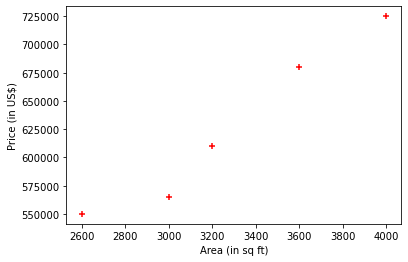

In [38]:
df = pd.read_csv('LR1.csv')
# %matplotlib inline
plt.xlabel('Area (in sq ft)')
plt.ylabel('Price (in US$)')
plt.scatter(df.Area,df.Price,color = 'red',marker = '+')
reg = linear_model.LinearRegression()
reg.fit(df[['Area']],df.Price)
reg.predict([[3300]])


In [40]:
import pickle
with open ('model_pickle','wb') as f:
    pickle.dump(reg,f)

In [42]:
with open('model_pickle','rb') as f :
    model1 = pickle.load(f)

In [44]:
model1.predict([[5000]])


array([859554.79452055])